# 3. EDOs lineares de alta ordem

A estrutura teórica e os métodos de resolução desenvolvidos para equações lineares de segunda ordem podem ser estendidos, diretamente, para equações lineares de terceira ordem e de ordem mais alta. 

Considere a equação diferencial linear homogênea de ordem $n$

$$a_0y^{(n)}+a_1y^{(n-1)}+...+a_{n-1}y'+a_n=0$$

a solução é obtida a partir das raízes da equação característica 

$$a_0r^{n}+a_1r^{n-1}+...+a_{n-1}r+a_n=0,$$

Vejamos alguns exemplos.

**Exemplo 1 (Raízes reais e distintas):** Encontre a solução de

$$y^{(4)}+y'''-7y''-y'+6=0$$ 

com $y(0)=1$, $y'(0)=0$, $y''(0)=-2$ e $y'''(0)=-1$ e plote o gráfico.

In [178]:
import sympy as sym
sym.init_printing()

In [179]:
#resolvendo a equação característica 
r, c1, c2, c3, c4 = sym.symbols('r, c1, c2, c3, c4')
sym.solve(r**4+r**3-7*r**2-r+6)          

[-3, -1, 1, 2]

In [180]:
#escrevendo a solução geral
t = sym.symbols('t')
y = sym.Function('y')(t)
y = c1*sym.exp(t)+c2*sym.exp(-t)+c3*sym.exp(2*t)+c4*sym.exp(-3*t)
y

    t       -t       2⋅t       -3⋅t
c₁⋅ℯ  + c₂⋅ℯ   + c₃⋅ℯ    + c₄⋅ℯ    

In [181]:
# derivando a solução
dy = sym.lambdify(t, y.diff(t))
d2y = sym.lambdify(t, y.diff(t,t))
d3y = sym.lambdify(t, y.diff(t,t,t))
y = sym.lambdify(t, y)

In [182]:
# aplicando as condições iniciais
eq1 = sym.Eq(y(0),1)
eq2 = sym.Eq(dy(0),0)
eq3 = sym.Eq(d2y(0),-2)
eq4 = sym.Eq(d3y(0),1)

In [183]:
# resolvendo o sistema
C = sym.solve([eq1,eq2,eq3,eq4])
C

{c₁: 1.125, c₂: 0.583333333333333, c₃: -0.533333333333333, c₄: -0.175}

In [184]:
s_part = C[c1]*sym.exp(t)+C[c2]*sym.exp(-t)+C[c3]*sym.exp(2*t)+C[c4]*sym.exp(-3*t)
s_part

                     2⋅t          t                      -t          -3⋅t
- 0.533333333333333⋅ℯ    + 1.125⋅ℯ  + 0.583333333333333⋅ℯ   - 0.175⋅ℯ    

O mesmo resultado poderia ser obtido fazendo simplesmente

In [185]:
y = sym.Function('y')(t)

eq = y.diff(t,t,t,t)+y.diff(t,t,t)-7*y.diff(t,t)-y.diff(t)+6*y

sol = sym.dsolve(eq, y,
           ics={y.subs(t, 0):1, 
                y.diff(t).subs(t, 0): 0,
                y.diff(t,t).subs(t, 0): -2,
                y.diff(t,t,t).subs(t, 0): -1})
sol

            2⋅t       t      -t    -3⋅t
         2⋅ℯ      11⋅ℯ    5⋅ℯ     ℯ    
y(t) = - ────── + ───── + ───── - ─────
           3        8       12      8  

In [186]:
import numpy as np
import matplotlib.pyplot as plt

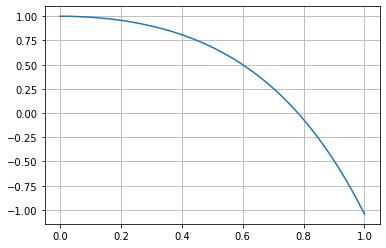

In [187]:
f = sym.lambdify(t,sol.rhs)
t = np.linspace(0,1)
plt.plot(t, f(t))
plt.grid()
plt.show()

**Exemplo 2 (Raízes complexas):** Encontre a solução geral de $$y^{(4)}-y'=0$$ 

com $y(0)=7/2$, $y'(0)=-4$, $y''(0)=5/2$ e $y'''(0)=-2$ e plote o gráfico.

In [188]:
#resolvendo a equação característica
sym.solve(r**4-1)    

[-1, 1, -ⅈ, ⅈ]

In [189]:
#escrevendo a solução geral
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = y.diff(t,t,t,t)-y
sym.dsolve(eq, y)

           -t       t                        
y(t) = C₁⋅ℯ   + C₂⋅ℯ  + C₃⋅sin(t) + C₄⋅cos(t)

In [190]:
sol = sym.dsolve(eq, y,
           ics={y.subs(t, 0):7/2, 
                y.diff(t).subs(t, 0): -4,
                y.diff(t,t).subs(t, 0): 5/2,
                y.diff(t,t,t).subs(t, 0): -2})
sol

                                       -t
y(t) = -1.0⋅sin(t) + 0.5⋅cos(t) + 3.0⋅ℯ  

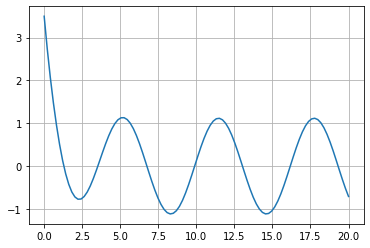

In [191]:
f = sym.lambdify(t,sol.rhs)
t = np.linspace(0,20,100)
plt.plot(t, f(t))
plt.grid()
plt.show()

**Exemplo 3 (Raízes repetidas):** Encontre a solução geral de $y^{(4)}+2y''+y'=0$.

In [192]:
#resolvendo a equação característica
sym.solve(r**4+2*r**2+1)    

[-ⅈ, ⅈ]

In [193]:
#escrevendo a solução geral
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = y.diff(t,t,t,t)+2*y.diff(t,t)+y
sym.dsolve(eq, y)

y(t) = (C₁ + C₂⋅t)⋅sin(t) + (C₃ + C₄⋅t)⋅cos(t)

**Exemplo 4 (Raízes repetidas):** Encontre a solução geral de $y^{(4)}+y'=0$.

In [194]:
#resolvendo a equação característica
sym.solve(r**4+1)    

⎡  √2   √2⋅ⅈ    √2   √2⋅ⅈ  √2   √2⋅ⅈ  √2   √2⋅ⅈ⎤
⎢- ── - ────, - ── + ────, ── - ────, ── + ────⎥
⎣  2     2      2     2    2     2    2     2  ⎦

In [195]:
#escrevendo a solução geral
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = y.diff(t,t,t,t)+y
sym.dsolve(eq, y)

                                      -√2⋅t                                   
                                      ──────                                  
       ⎛      ⎛√2⋅t⎞         ⎛√2⋅t⎞⎞    2      ⎛      ⎛√2⋅t⎞         ⎛√2⋅t⎞⎞  
y(t) = ⎜C₁⋅sin⎜────⎟ + C₂⋅cos⎜────⎟⎟⋅ℯ       + ⎜C₃⋅sin⎜────⎟ + C₄⋅cos⎜────⎟⎟⋅ℯ
       ⎝      ⎝ 2  ⎠         ⎝ 2  ⎠⎠           ⎝      ⎝ 2  ⎠         ⎝ 2  ⎠⎠  

√2⋅t
────
 2  
    
    